In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
#from keras.layers.core import Dense,Activation,Dropout
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, GRU, BatchNormalization, TimeDistributed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [ ]:
fashion_train.head()

In [ ]:
fashion_train.columns#to check the columns

In [ ]:
fashion_test.columns

In [3]:
X_train=fashion_train.drop('label',axis=1)
X_test=fashion_test.drop('label',axis=1)


In [4]:
y_train=fashion_train['label']
y_test=fashion_test['label']


In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test.shape

(10000, 784)

In [7]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [8]:
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

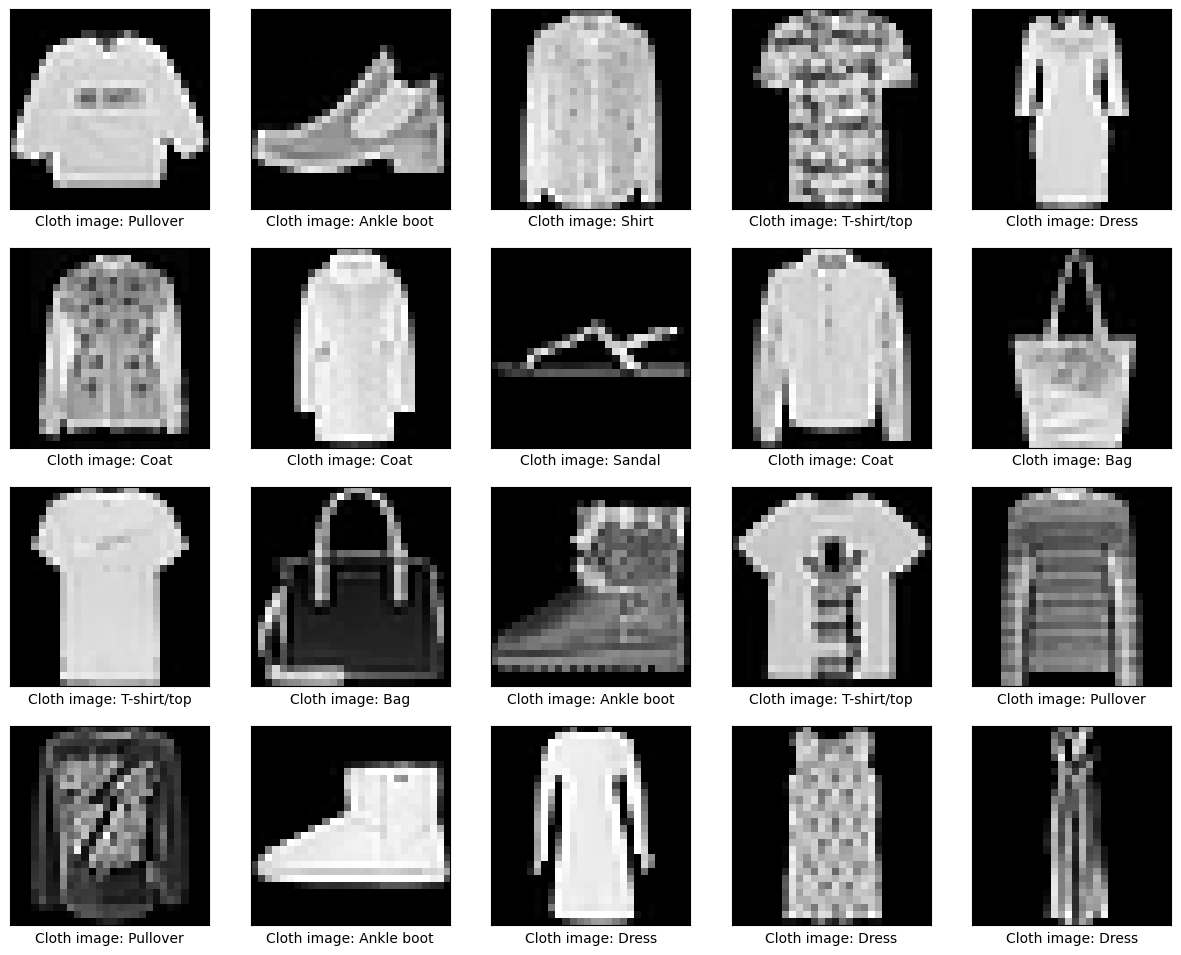

In [9]:
#Plot the image for the train set
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#Reshaping the train and test set to matrix position for cehcking the image
X_train_reshape=X_train.values.reshape(-1,28,28)
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train_reshape[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Cloth image: {col_names[y_train[i]]}')
plt.show()

In [10]:
#Convert target label to one hot encoding vector
y_train_encoding=to_categorical(y_train,num_classes=10)
y_test_encoding=to_categorical(y_test,num_classes=10)

In [11]:
y_train_encoding

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
y_test_encoding

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [55]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,754 (874.04 KB)

 Trainable params: 222,986 (871.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history=model.fit(X_train,y_train_encoding,batch_size=100,epochs=30,validation_data=(X_test,y_test_encoding))

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6479 - loss: 1.0403 - val_accuracy: 0.8372 - val_loss: 0.4466
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8082 - loss: 0.5463 - val_accuracy: 0.8613 - val_loss: 0.3914
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8301 - loss: 0.4894 - val_accuracy: 0.8566 - val_loss: 0.4051
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8345 - loss: 0.4741 - val_accuracy: 0.8566 - val_loss: 0.4155
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8439 - loss: 0.4507 - val_accuracy: 0.8643 - val_loss: 0.3924
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8476 - loss: 0.4374 - val_accuracy: 0.8675 - val_loss: 0.3952
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8526 - loss: 0.4233 - val_accuracy: 0.8640 - val_loss: 0.3954
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8509 - loss: 0.4246 - val_accuracy: 0.

In [60]:
test_loss,test_acc=model.evaluate(X_test,y_test_encoding)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8801 - loss: 0.3387


In [61]:
y_test_encoding

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [62]:
#Predicting the label

y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [63]:
y_pred

array([[6.5865928e-01, 1.8693378e-05, 1.2884926e-03, ..., 5.8659703e-06,
        1.2725772e-04, 2.1813739e-06],
       [1.1465260e-06, 9.9999607e-01, 2.7179632e-07, ..., 1.2540147e-09,
        5.6420916e-08, 3.7549230e-09],
       [4.9513541e-03, 5.4596976e-06, 8.5331684e-01, ..., 3.5564372e-07,
        4.6262761e-05, 3.5559421e-07],
       ...,
       [1.0115925e-07, 3.5165384e-10, 3.6425426e-08, ..., 2.8651566e-08,
        9.9999952e-01, 1.1472553e-08],
       [1.5941601e-02, 3.5803860e-05, 1.8352398e-03, ..., 1.0793583e-04,
        9.0301418e-01, 1.1797527e-05],
       [5.2851882e-02, 7.7738106e-01, 4.4547822e-02, ..., 2.7596846e-04,
        2.2990739e-03, 4.4443514e-04]], dtype=float32)

In [64]:
y_pred=np.argmax(y_pred,axis=1)

In [65]:
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [66]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

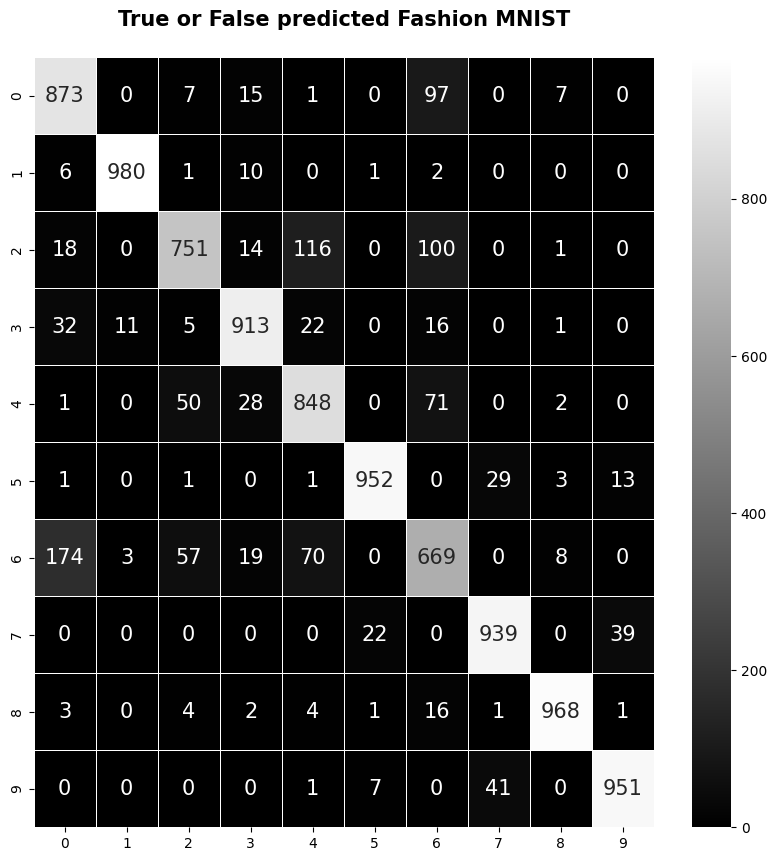

In [67]:
#confusion_matrix for fashion mnist
cf=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(cf,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [68]:
#to check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.75      0.80      1000
           3       0.91      0.91      0.91      1000
           4       0.80      0.85      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.69      0.67      0.68      1000
           7       0.93      0.94      0.93      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [69]:
history.history

{'accuracy': [0.7397333383560181,
  0.8122666478157043,
  0.8293333053588867,
  0.8374000191688538,
  0.8431166410446167,
  0.8476999998092651,
  0.8520333170890808,
  0.8500166535377502,
  0.8547333478927612,
  0.8570166826248169,
  0.8593666553497314,
  0.8617666959762573,
  0.8644833564758301,
  0.8605333566665649,
  0.8658999800682068,
  0.8657833337783813,
  0.8685166835784912,
  0.8699833154678345,
  0.871483325958252,
  0.872783362865448,
  0.8745333552360535,
  0.8754000067710876,
  0.8761333227157593,
  0.8756499886512756,
  0.8754833340644836,
  0.876716673374176,
  0.8760333061218262,
  0.8771499991416931,
  0.8775833249092102,
  0.8783000111579895],
 'loss': [0.7580926418304443,
  0.5376735329627991,
  0.49223828315734863,
  0.4675816595554352,
  0.4518057107925415,
  0.43693807721138,
  0.42470091581344604,
  0.42751139402389526,
  0.4170866906642914,
  0.40543806552886963,
  0.3986544609069824,
  0.3907289206981659,
  0.3857993185520172,
  0.3892156481742859,
  0.38192081

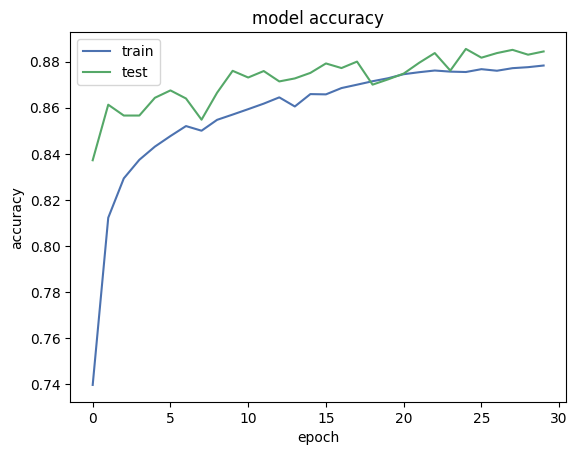

In [70]:
#to view the plot for accuracy and los
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

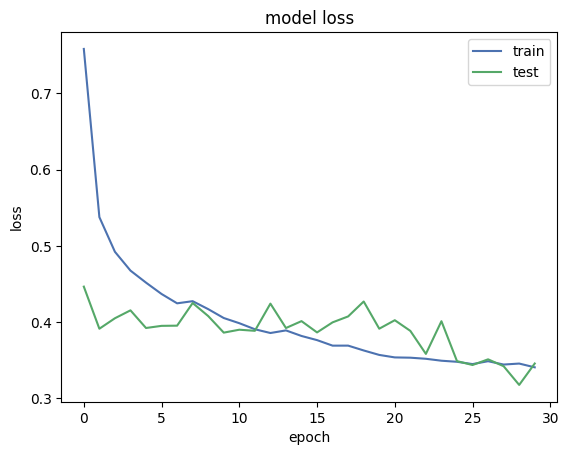

In [71]:
#to view the plot for accuracy and los
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [72]:
#check the image for test data set

y_test_unique=np.unique(y_test)

In [45]:
y_test_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

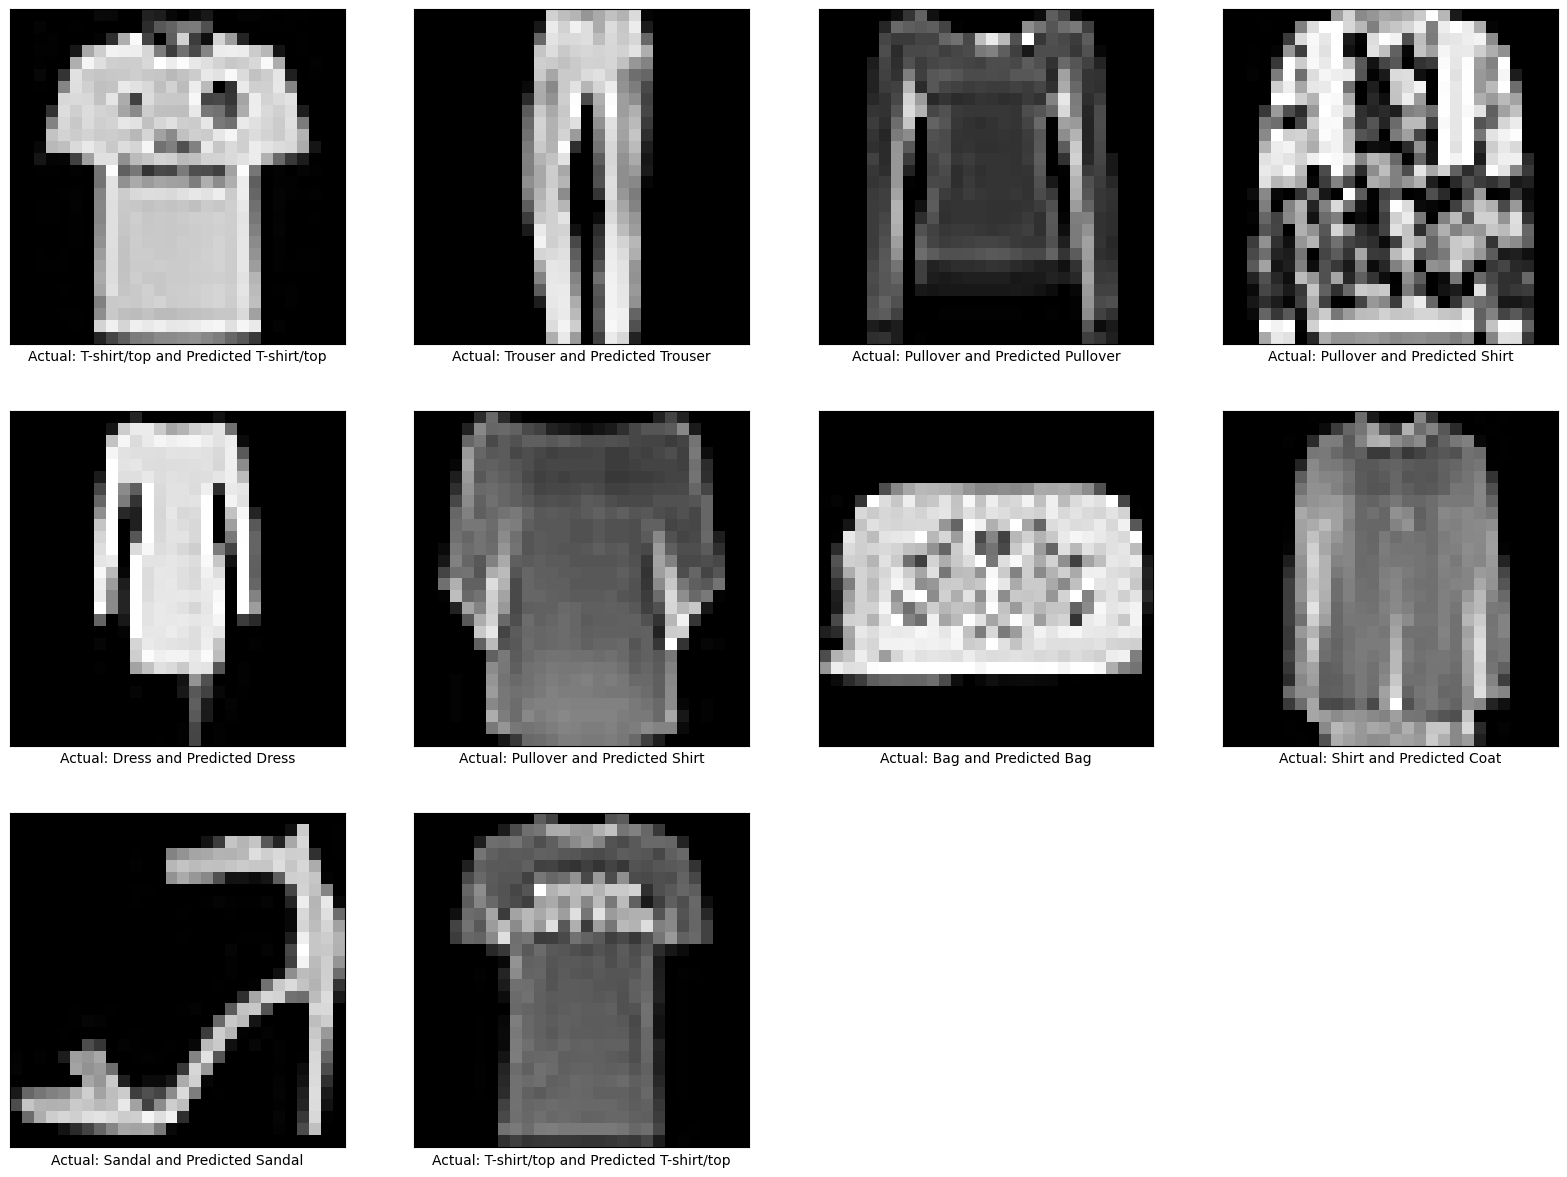

In [73]:
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
X_test_reshape=X_test.values.reshape(-1,28,28)
plt.figure(figsize=(20,20))
for i in y_test_unique:
    plt.subplot(4,4,i+1)
    plt.imshow(X_test_reshape[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Actual: {col_names[y_test[i]]} and Predicted {col_names[y_pred[i]]}')
plt.show()